In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import trackpy as tp
import os
import seaborn as sns
import numpy as np

In [1]:
exp_path = '/Volumes/GoogleDrive/My Drive/postdoc/Raw_Data/20230119_runx2_tracking'
tracks_path = os.path.join(exp_path, 'processed_tracks')
tracks = [f for f in os.listdir(tracks_path) if '.csv' in f]

In [4]:
df_full = []
for t in tracks:
    df = pd.read_csv(os.path.join(tracks_path, t), )
    df = df[df.compartment == 'nuc']
    df = tp.filter_stubs(df, 3)
    if '100mm' in t:
        df['condition'] = 'sorb'
    else:
        df['condition'] = 'ctrl'
    df_full.append(df)
print('done')
df = pd.concat(df_full)


done


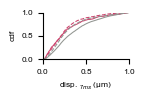

In [39]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.it'] = 'Arial:italic'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['font.size'] = 6
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['font.size'] = 6

pixel_size = .223232
sorb7 = df.loc[df.condition == 'sorb']['R_SF'].dropna()*pixel_size
ctrl7 = df.loc[df.condition == 'ctrl']['R_SF'].dropna()*pixel_size
sorb = df.loc[df.condition == 'sorb']['R_SF_3'].dropna()*pixel_size
ctrl = df.loc[df.condition == 'ctrl']['R_SF_3'].dropna()*pixel_size

fig,ax = plt.subplots(figsize=(1.5,1))

def plot_cumsum(entry_list, axis, color, ls='-'):  
    count, bins_count = np.histogram(entry_list, bins=np.linspace(0,1,100))#entry_list.max(),500))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    axis.plot(bins_count[1:], cdf, lw=.75, color=color,ls=ls)

plot_cumsum(sorb, ax, '#cb416b')
plot_cumsum(ctrl, ax, '#929591')
plot_cumsum(sorb7, ax, '#cb416b', ls='--')
plot_cumsum(ctrl7, ax, '#929591',ls='--')


ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_xlabel(r'disp. $_{7ms}$ (µm)')
ax.set_ylabel('cdf')
sns.despine()
fig.tight_layout()
plt.savefig('/Volumes/GoogleDrive/My Drive/postdoc/proposals/2023_JCC/TF_SPT_CDF-both.pdf')

In [ ]:
print(full_df)